In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

In [363]:
# Liên kết google drive và google colab
#from google.colab import drive
#drive.mount("/content/gdrive")

In [364]:
# Đọc dữ liệu
#df = pd.read_csv("/content/gdrive/MyDrive/PTDL/Do An/Diet_R.csv")
df = pd.read_csv("Diet_R.csv")

In [365]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [366]:
# Trích thông tin của tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


Ta nhận thấy người thứ 25 và 26 bị thiếu mất dữ liệu. Ta tiến hành xóa đi người 25, 26 và sắp xếp lại thứ tự.

In [367]:
# Xóa những người bị thiếu dữ liệu (25, 26)
df.drop(df.loc[df.Person == 25].index, inplace = True)
df.drop(df.loc[df.Person == 26].index, inplace = True)

In [368]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [369]:
# Sắp xếp lại số thứ tự 
serial = []
print(len(df))
for i in range (1, len(df) + 1):
    serial.append(i)
df["Person"] = serial
df_new = df.set_index("Person").sort_index()
df_new

76


,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
72,1,35,183,83,3,80.2
73,1,49,177,84,3,79.9
74,1,28,164,85,3,79.7


In [370]:
for i in df_new.index:
    print(i, end = " ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 

In [371]:
df.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,39.223684,170.776316,72.289474,2.039474,68.343421
std,22.083176,9.908379,11.419981,7.974653,0.823663,8.058938
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,19.750000,32.500000,163.750000,66.000000,1.000000,61.950000
50%,38.500000,39.000000,169.000000,72.000000,2.000000,68.950000
75%,57.250000,47.250000,175.250000,78.000000,3.000000,73.675000
max,76.000000,60.000000,201.000000,88.000000,3.000000,84.500000


# **Paired t-test**
*Research question:* **Ignore diet and test to see if weight has been lost**

"Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa"

Phát biểu giả thuyết
- $$H_{0}: \mu_{0} = \mu_{1}$$
    Cân nặng trung bình của trước và sau khi giảm cân là bằng nhau
- $$H_{1}: \mu_{0} <> \mu_{1}$$
    Cân nặng trung bình của trước và sau khi giảm cân là khác nhau

In [372]:
stat, p_value = stats.ttest_ind(df["pre.weight"], df["weight6weeks"])
print("Stat =", stat, ";P_value =", p_value)
if p_value < 0.05:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết H0.")
else:
    print("Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.")

AttributeError: 'numpy.float64' object has no attribute 'ttest_ind'

Kết luận răng cân nặng trung bình trước và sau qua trình giảm cân là khác nhau.


Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm cân')

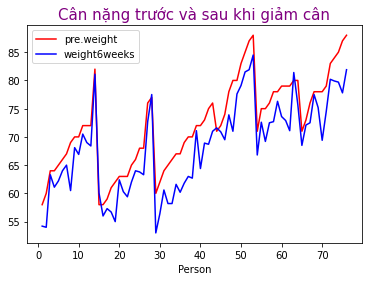

In [ ]:
df_new[["pre.weight", "weight6weeks"]].plot(color = ["red", "blue"])
plt.title("Cân nặng trước và sau khi giảm cân", fontsize = 15, color = "purple")

# **Compute variable**
*Research question:* **Remove weight lost and get students to calculate it using before/after weights**

"Loại bỏ trọng lượng đã giảm và hãy tính toán nó bằng cách sử dụng cân nặng trước và sau"

In [ ]:
#Tính chỉ số cân năng đã giảm
#Thêm cột cân nặng đã giảm
weightlost = df_new["pre.weight"] - df_new["weight6weeks"] 
df_new["weightlost"] = weightlost.values
df_new

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
72,1,35,183,83,3,80.2,2.8
73,1,49,177,84,3,79.9,4.1
74,1,28,164,85,3,79.7,5.3


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight lost')

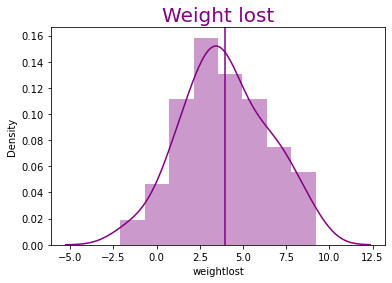

In [ ]:
sns.distplot(df_1['weightlost'], color = 'purple')
plt.axvline(df_1['weightlost'].mean(), color = "purple")
plt.title('Weight lost', size = 20, color = 'purple')

# **Summarry statistics**

*Research question:* **Summarry statistics by diet**

"Thống kê tóm tắt theo chế độ ăn kiêng"

Kết hợp với đọc tài liệu, lọc dữ liệu ta biết được có 76 người và có 3 nhóm diet: 1, 2, 3

In [ ]:
weightlost_1 = []
weightlost_2 = []
weightlost_3 = []
df_1 = df_new[["Diet", "weightlost", "gender"]]
wl = df_1["weightlost"]
gd = df_1["gender"]
diet = df_1["Diet"]

for i in df_1.index:
    if diet[i] == 1 :
        weightlost_1.append(wl[i])
    if diet[i] == 2:
        weightlost_2.append(wl[i])
    if diet[i] == 3:
        weightlost_3.append(wl[i])
    
weight_lost = list(zip(weightlost_1, weightlost_2, weightlost_3))
df_2 =  pd.DataFrame(weight_lost, columns = ("Diet 1", "Diet 2", "Diet 3"))
df_2

,Diet 1,Diet 2,Diet 3
0,3.8,-2.1,7.0
1,6.0,2.0,5.6
2,0.7,1.7,3.4
3,2.9,4.3,6.8
4,2.8,7.0,7.8
5,2.0,0.6,5.4
6,2.0,2.7,6.8
7,8.5,3.6,7.2
8,1.9,3.0,7.0
9,3.1,2.0,7.3


# **One way ANOVA**
*Research question:* **Which diet was best for losing weight?**

"Chế độ ăn kiêng nào là tốt nhất để giảm cân?"

Xây dựng giả thuyết :
$$H_{0}: \mu_{1} = \mu_{2} = ... = \mu_{n}$$
$$H_{a}: \text{Tồn tại ít nhất một cặp } (\mu_{i}, \mu_{j}) \text{ có giá trị khác nhau}$$

**Bắt đầu tiến hành kiểm định các nhóm có lấy từ phân phối chuẩn**

Phát biểu giả thuyết :

Giả thuyết null

$$H_0 : \text{Các nhóm được lấy từ phân phối chuẩn}$$

Giả thuyết thay thế 

$$H_a:\text{Các nhóm không được lấy từ phân phối chuẩn}$$ 

In [ ]:
stats, p_value = st.shapiro(df_2["Diet 1"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0")
  print('Các nhóm không tuân theo phân phối chuẩn.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0. ")
  print('Dữ liệu được lấy từ phân phối chuẩn.')

p_value: 0.07748671621084213
Không có bằng chứng bác bỏ  giả thuyết H0. 
Dữ liệu được lấy từ phân phối chuẩn.


In [ ]:
stats, p_value = st.shapiro(df_2["Diet 2"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0")
  print('Các nhóm không tuân theo phân phối chuẩn.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0. ")
  print('Dữ liệu được lấy từ phân phối chuẩn.')

p_value: 0.931334376335144
Không có bằng chứng bác bỏ  giả thuyết H0. 
Dữ liệu được lấy từ phân phối chuẩn.


In [ ]:
stats, p_value = st.shapiro(df_2["Diet 3"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0")
  print('Các nhóm không tuân theo phân phối chuẩn.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0. ")
  print('Dữ liệu được lấy từ phân phối chuẩn.')

p_value: 0.17290475964546204
Không có bằng chứng bác bỏ  giả thuyết H0. 
Dữ liệu được lấy từ phân phối chuẩn.


In [ ]:
def qq_plot(data):
    def standadize(data):
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean)/std
    
    sm.qqplot(standadize(data), line ='45')
    plt.show()

**Tiến hành kiểm định phương sai của các nhóm có sự khác biệt**

Xây dựng giả thuyết với mức ý nghĩa 0.05:
 - Giả thuyết null:

 $H_0$: Các nhóm có phương sai giống nhau 
 - Giả thuyết thay thế:
 
 $H_a$: Các nhóm có phương sai không giống nhau 

In [ ]:
stats, p_value = st.bartlett(df_2["Diet 1"], df_2["Diet 2"], df_2["Diet 3"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0.")
  print('Không đủ điều kiện đê phân tích ANOVA.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0.")
  print('Đủ điều kiện đê phân tích ANOVA.')

p_value: 0.8661762468702207
Không có bằng chứng bác bỏ  giả thuyết H0.
Đủ điều kiện đê phân tích ANOVA.


**Ta tiến hành phân tích ANOVA 1 chiều với dữ liệu vì các nhóm đều độc lập, được lấy từ phân phối chuẩn và giống về phương sai**


Phát biểu giả thuyết:

Giả thuyết null

$$H_0 : \text{Các biện pháp giảm cân không có hiệu quả khác biệt}$$

Giả thuyết thay thế 

$$H_a:\text{Các biện pháp giảm cân có sự hiệu quả khác biệt}$$

In [ ]:
stats, p_value = st.f_oneway(df_2["Diet 1"], df_2["Diet 2"], df_2["Diet 3"])
print("p_value:",p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ giả thuyết H0")
else:
  print("Không có bằng chứng bác bỏ giả thuyết H0")

p_value: 0.02378518834763086
Có bằng chứng bác bỏ giả thuyết H0


*Kết luận rằng : Các biện pháp giảm cân có sự khác biệt*

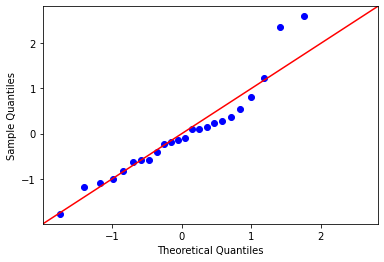

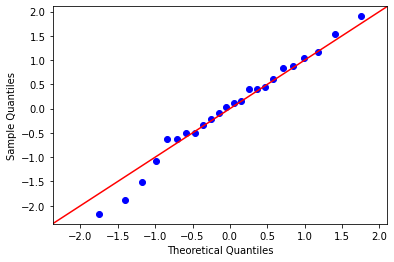

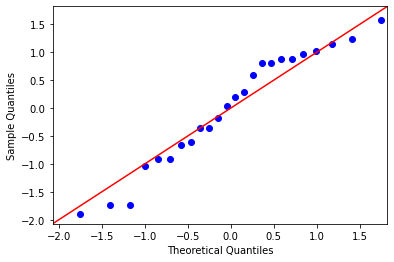

In [ ]:
qq_plot(df_2["Diet 1"])
qq_plot(df_2["Diet 2"])
qq_plot(df_2["Diet 3"])

Text(0.5, 1.0, 'Diet 3')

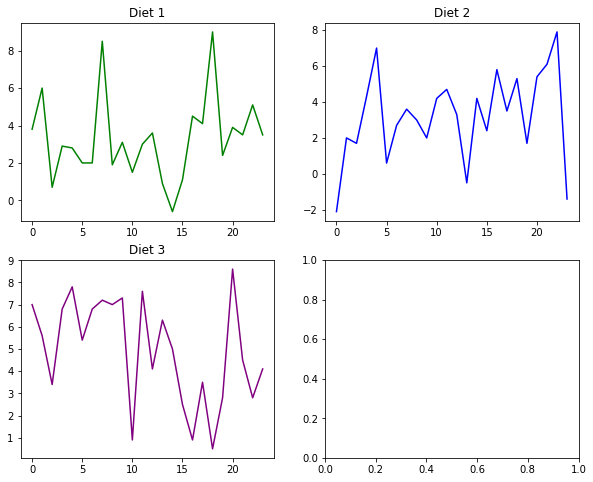

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 8))
ax1.plot(df_2["Diet 1"], color = 'green')
ax1.set_title("Diet 1")
ax2.plot(df_2["Diet 2"], color = 'blue')
ax2.set_title("Diet 2")
ax3.plot(df_2["Diet 3"], color = 'purple')
ax3.set_title("Diet 3")

**Chế độ ăn nào tốt nhất để giảm cân?**

In [ ]:
#Tạo hàm tính min, max và std
def mms(a):
    print(a.name)
    Min = a.min()
    Max = a.max()
    print("min =", Min)
    print("max =", Max)
    print("max - min =", Max - Min)
    a.std()
    print("--"*30)

In [ ]:
diet1 = mms(df_2["Diet 1"])
diet2 = mms(df_2["Diet 2"])
diet3 = mms(df_2["Diet 3"])
print(diet1)
print(diet2)
print(diet3)

Diet 1
min = -0.5999999999999943
max = 9.0
max - min = 9.599999999999994
------------------------------------------------------------
Diet 2
min = -2.1000000000000014
max = 7.900000000000006
max - min = 10.000000000000007
------------------------------------------------------------
Diet 3
min = 0.5
max = 8.599999999999994
max - min = 8.099999999999994
------------------------------------------------------------
None
None
None


In [ ]:
mean1 = df_2["Diet 1"].mean()
mean2 = df_2["Diet 2"].mean()
mean3 = df_2["Diet 3"].mean()

print("Mean Diet1 =", mean1)
print("Mean Diet2 =", mean2)
print("Mean Diet3 =", mean3)
if mean1 < mean2:
    if mean2 > mean3:
        print("Nhóm diet 2 giảm cân hiệu quả nhất.")
    else:
        print("Nhóm diet 3 giảm cân hiệu quả nhất.")
else:
    if mean1 > mean3:
        print("Nhóm diet 1 giảm cân hiệu quả nhất.")
    else:
        print("Nhóm diet 3 giảm cân hiệu quả nhất.")

Mean Diet1 = 3.2999999999999994
Mean Diet2 = 3.225
Mean Diet3 = 4.933333333333332
Nhóm diet 3 giảm cân hiệu quả nhất


# **One way ANOVA**
*Research question:* **Are there gender differences for weight lost?**

"Khả năng giảm cân có phụ thuộc vào giới tính hay không?"

Xây dựng giả thuyết :
$$H_{0}: \mu_{1} = \mu_{2} = ... = \mu_{n}$$
$$H_{a}: \text{Tồn tại ít nhất một cặp } (\mu_{i}, \mu_{j}) \text{ có giá trị khác nhau}$$

In [ ]:
df_3 = df_1.drop(["Diet"], axis = 1)
df_3

,weightlost,gender
Person,,
1,3.8,0
2,6.0,0
3,0.7,0
4,2.9,0
5,2.8,0
...,...,...
72,2.8,1
73,4.1,1
74,5.3,1


In [ ]:
wl_1 = []
wl_2 = []
wl = df_3["weightlost"]
gd = df_3["gender"]
for i in df_3.index:
    if gd[i] == "1":
        wl_1.append(wl1[i])
    else:
        wl_2.append(wl1[i])

weight_lost_gen = list(zip(wl_1, wl_2))
df_gen =  pd.DataFrame(weight_lost_gen, columns = ("Nam", "Nữ"))
df_gen

,Nam,Nữ
0,-0.6,3.8
1,1.1,6.0
2,4.5,0.7
3,4.1,2.9
4,9.0,2.8
5,2.4,2.0
6,3.9,2.0
7,3.5,8.5
8,5.1,1.9
9,3.5,3.1


**Bắt đầu tiến hành kiểm định các nhóm có lấy từ phân phối chuẩn**

Phát biểu giả thuyết :

Giả thuyết null

$$H_0 : \text{Các nhóm được lấy từ phân phối chuẩn}$$

Giả thuyết thay thế 

$$H_a:\text{Các nhóm không được lấy từ phân phối chuẩn}$$ 

In [ ]:
stats, p_value = st.shapiro(df_gen["Nam"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0")
  print('Các nhóm không tuân theo phân phối chuẩn.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0. ")
  print('Dữ liệu được lấy từ phân phối chuẩn.')

p_value: 0.6382929682731628
Không có bằng chứng bác bỏ  giả thuyết H0. 
Dữ liệu được lấy từ phân phối chuẩn.


In [ ]:
stats, p_value = st.shapiro(df_gen["Nữ"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0")
  print('Các nhóm không tuân theo phân phối chuẩn.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0. ")
  print('Dữ liệu được lấy từ phân phối chuẩn.')

p_value: 0.4651647210121155
Không có bằng chứng bác bỏ  giả thuyết H0. 
Dữ liệu được lấy từ phân phối chuẩn.


**Tiến hành kiểm định phương sai của các nhóm có sự khác biệt**

Xây dựng giả thuyết với mức ý nghĩa 0.05:
 - Giả thuyết null:

 $H_0$: Các nhóm có phương sai giống nhau 
 - Giả thuyết thay thế:
 
 $H_a$: Các nhóm có phương sai không giống nhau 

In [ ]:
stats, p_value = st.bartlett(df_gen["Nam"], df_gen["Nữ"])
print("p_value:", p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ  giả thuyết H0.")
  print('Không đủ điều kiện đê phân tích ANOVA.')
else:
  print("Không có bằng chứng bác bỏ  giả thuyết H0.")
  print('Đủ điều kiện đê phân tích ANOVA.')

p_value: 0.7475455904117572
Không có bằng chứng bác bỏ  giả thuyết H0.
Đủ điều kiện đê phân tích ANOVA.


**Ta tiến hành phân tích ANOVA 1 chiều với dữ liệu vì các nhóm đều độc lập, được lấy từ phân phối chuẩn và giống về phương sai**


Phát biểu giả thuyết:

Giả thuyết null

$$H_0 : \text{Các biện pháp giảm cân không có hiệu quả khác biệt}$$

Giả thuyết thay thế 

$$H_a:\text{Các biện pháp giảm cân có sự hiệu quả khác biệt}$$

In [ ]:
stats, p_value = st.f_oneway(df_gen["Nam"], df_gen["Nữ"])
print("p_value:",p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ giả thuyết H0")
else:
  print("Không có bằng chứng bác bỏ giả thuyết H0")

p_value: 0.2603216007162459
Không có bằng chứng bác bỏ giả thuyết H0


*Kết luận rằng : Sự giảm cân không phụ thuộc vào giới tính*

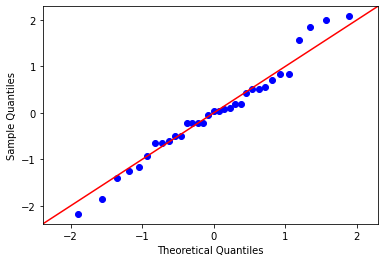

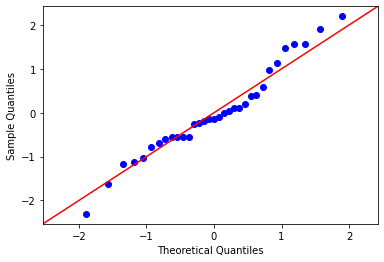

In [ ]:
qq_plot(df_gen["Nam"])
qq_plot(df_gen["Nữ"])